**1.colecting data**

In [2]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [6]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes (1).csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**3.Basic EDA and statistical analysis**

In [7]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



Metode DataFrame.describe() menghasilkan statistik deskriptif yang merangkum kecenderungan sentral, sebaran, dan bentuk distribusi dataset, tidak termasuk nilai NaN. Metode ini memberikan banyak informasi tentang dataset. Salah satu hal penting adalah bahwa metode describe() hanya berurusan dengan nilai numerik. Metode ini tidak berfungsi dengan nilai kategori manapun. Jadi jika ada nilai kategori dalam suatu kolom, metode describe() akan mengabaikannya dan menampilkan ringkasan untuk kolom lain kecuali parameter include="all" disertakan.

Sekarang, mari kita pahami statistik yang dihasilkan oleh metode describe():

-count memberi tahu kita jumlah baris yang tidak kosong dalam suatu fitur.

-mean memberi tahu kita nilai rata-rata dari fitur tersebut. std memberi tahu kita Nilai Deviasi Standar dari fitur tersebut.

-min memberi tahu kita nilai minimum dari fitur tersebut.

-25%, 50%, dan 75% adalah persentil / kuartil dari masing-masing fitur. Informasi kuartil ini membantu kita mendeteksi Pencilan.

-max memberi tahu kita nilai maksimum dari fitur tersebut.

In [8]:
#Detail statistik dasar tentang data (hanya kolom-kolom numerik yang akan ditampilkan di sini kecuali parameter include="all")
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**3.preprocessing**

Pertanyaan yang muncul dari ringkasan ini adalah apakah nilai minimum dari kolom-kolom yang terdaftar di bawah ini bisa nol (0)? Pada kolom-kolom ini, nilai nol tidak masuk akal dan oleh karena itu menandakan nilai yang hilang.

Kolom-kolom atau variabel berikut memiliki nilai nol yang tidak valid:

1.Glucose

2.BloodPressure

3.SkinThickness

4.Insulin

5.BMI

Lebih baik mengganti nol dengan NaN karena setelah itu menghitungnya akan lebih mudah, dan nol perlu diganti dengan nilai yang sesuai.

In [10]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64



Untuk mengisi nilai NaN tersebut, distribusi data perlu dipahami terlebih dahulu.

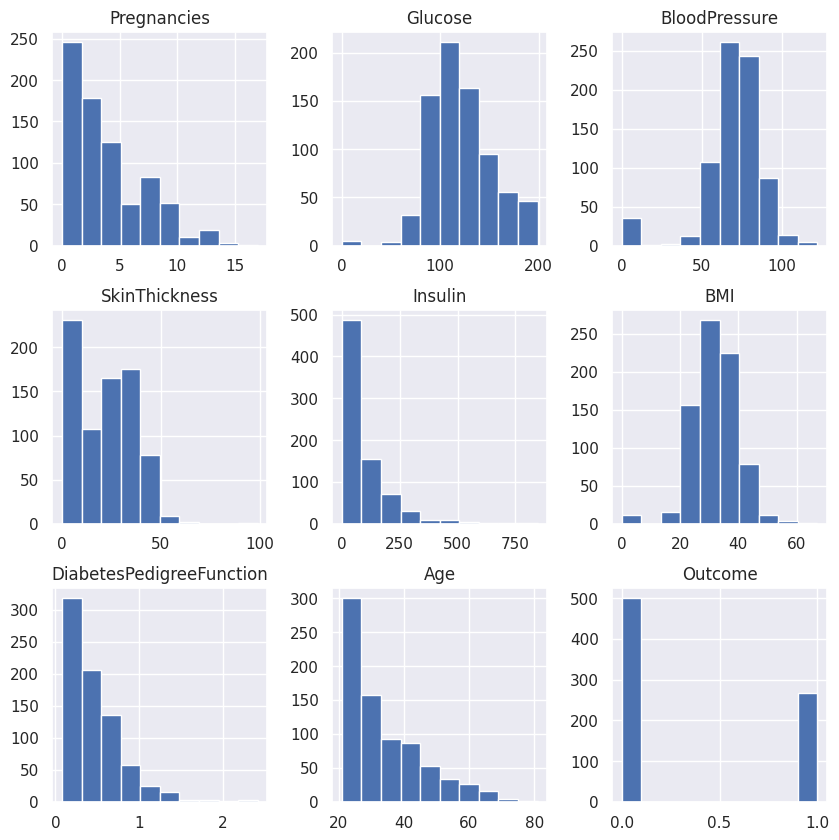

In [13]:
p = diabetes_data.hist(figsize = (10,10))


Bertujuan untuk mengisi nilai NaN untuk kolom-kolom sesuai dengan distribusi masing-masing.

In [14]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

Plotting setelah penghapusan nilai NaN.

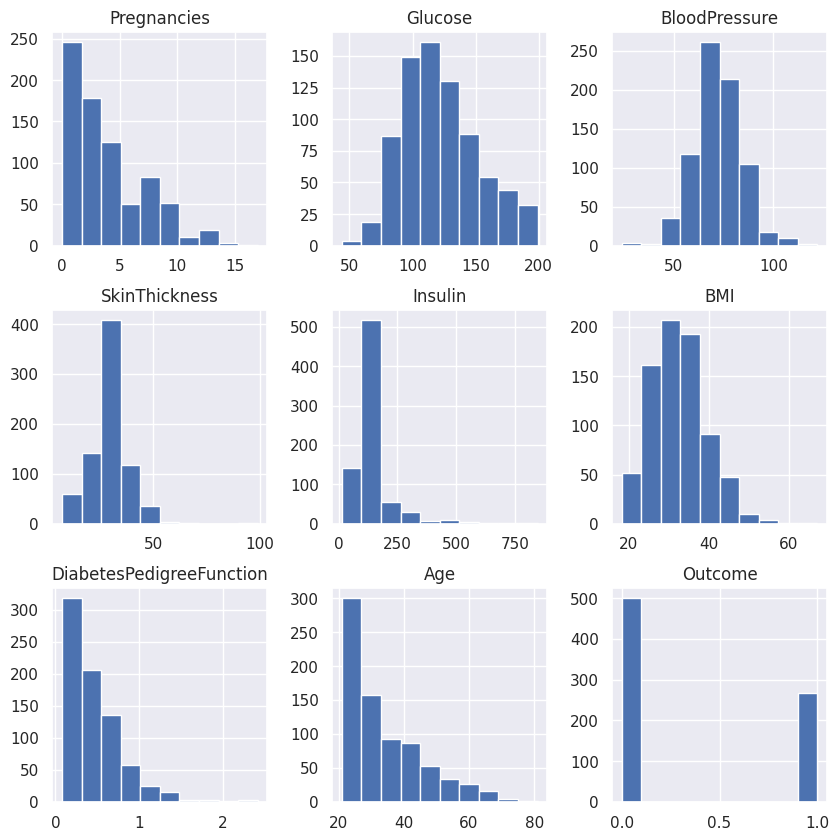

In [16]:
p = diabetes_data_copy.hist(figsize = (10,10))

Skewness

Distribusi yang condong ke kiri memiliki ekor panjang di sebelah kiri. Distribusi yang condong ke kiri juga disebut sebagai distribusi negatif. Hal ini karena terdapat ekor panjang ke arah negatif pada garis bilangan. Rata-rata juga berada di sebelah kiri puncak distribusi.

Distribusi yang condong ke kanan memiliki ekor panjang di sebelah kanan. Distribusi yang condong ke kanan juga disebut sebagai distribusi positif. Hal ini karena terdapat ekor panjang ke arah positif pada garis bilangan. Rata-rata juga berada di sebelah kanan puncak distribusi.

In [17]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

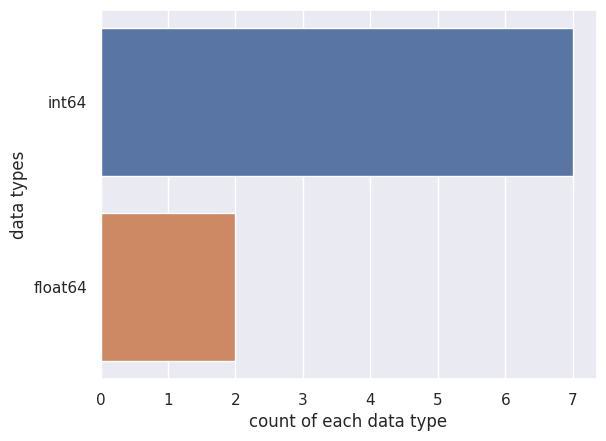

In [18]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

In [ ]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)

0    500
1    268
Name: Outcome, dtype: int64


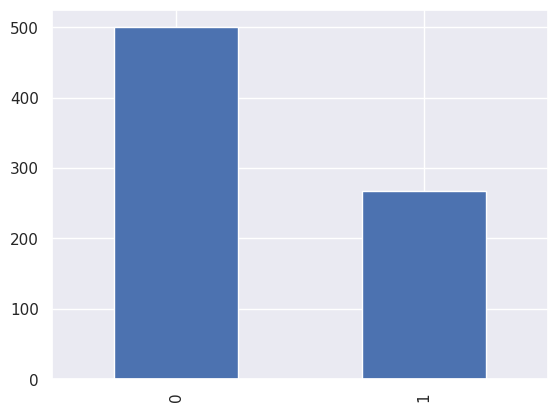

In [20]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf",
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

Grafik di atas menunjukkan bahwa data cenderung condong pada titik data dengan nilai hasil sebagai 0 yang berarti bahwa diabetes sebenarnya tidak ada. Jumlah orang yang tidak menderita diabetes hampir dua kali lipat dari jumlah pasien diabetes.

Scatter matrix  dari data yang belum dibersihkan.

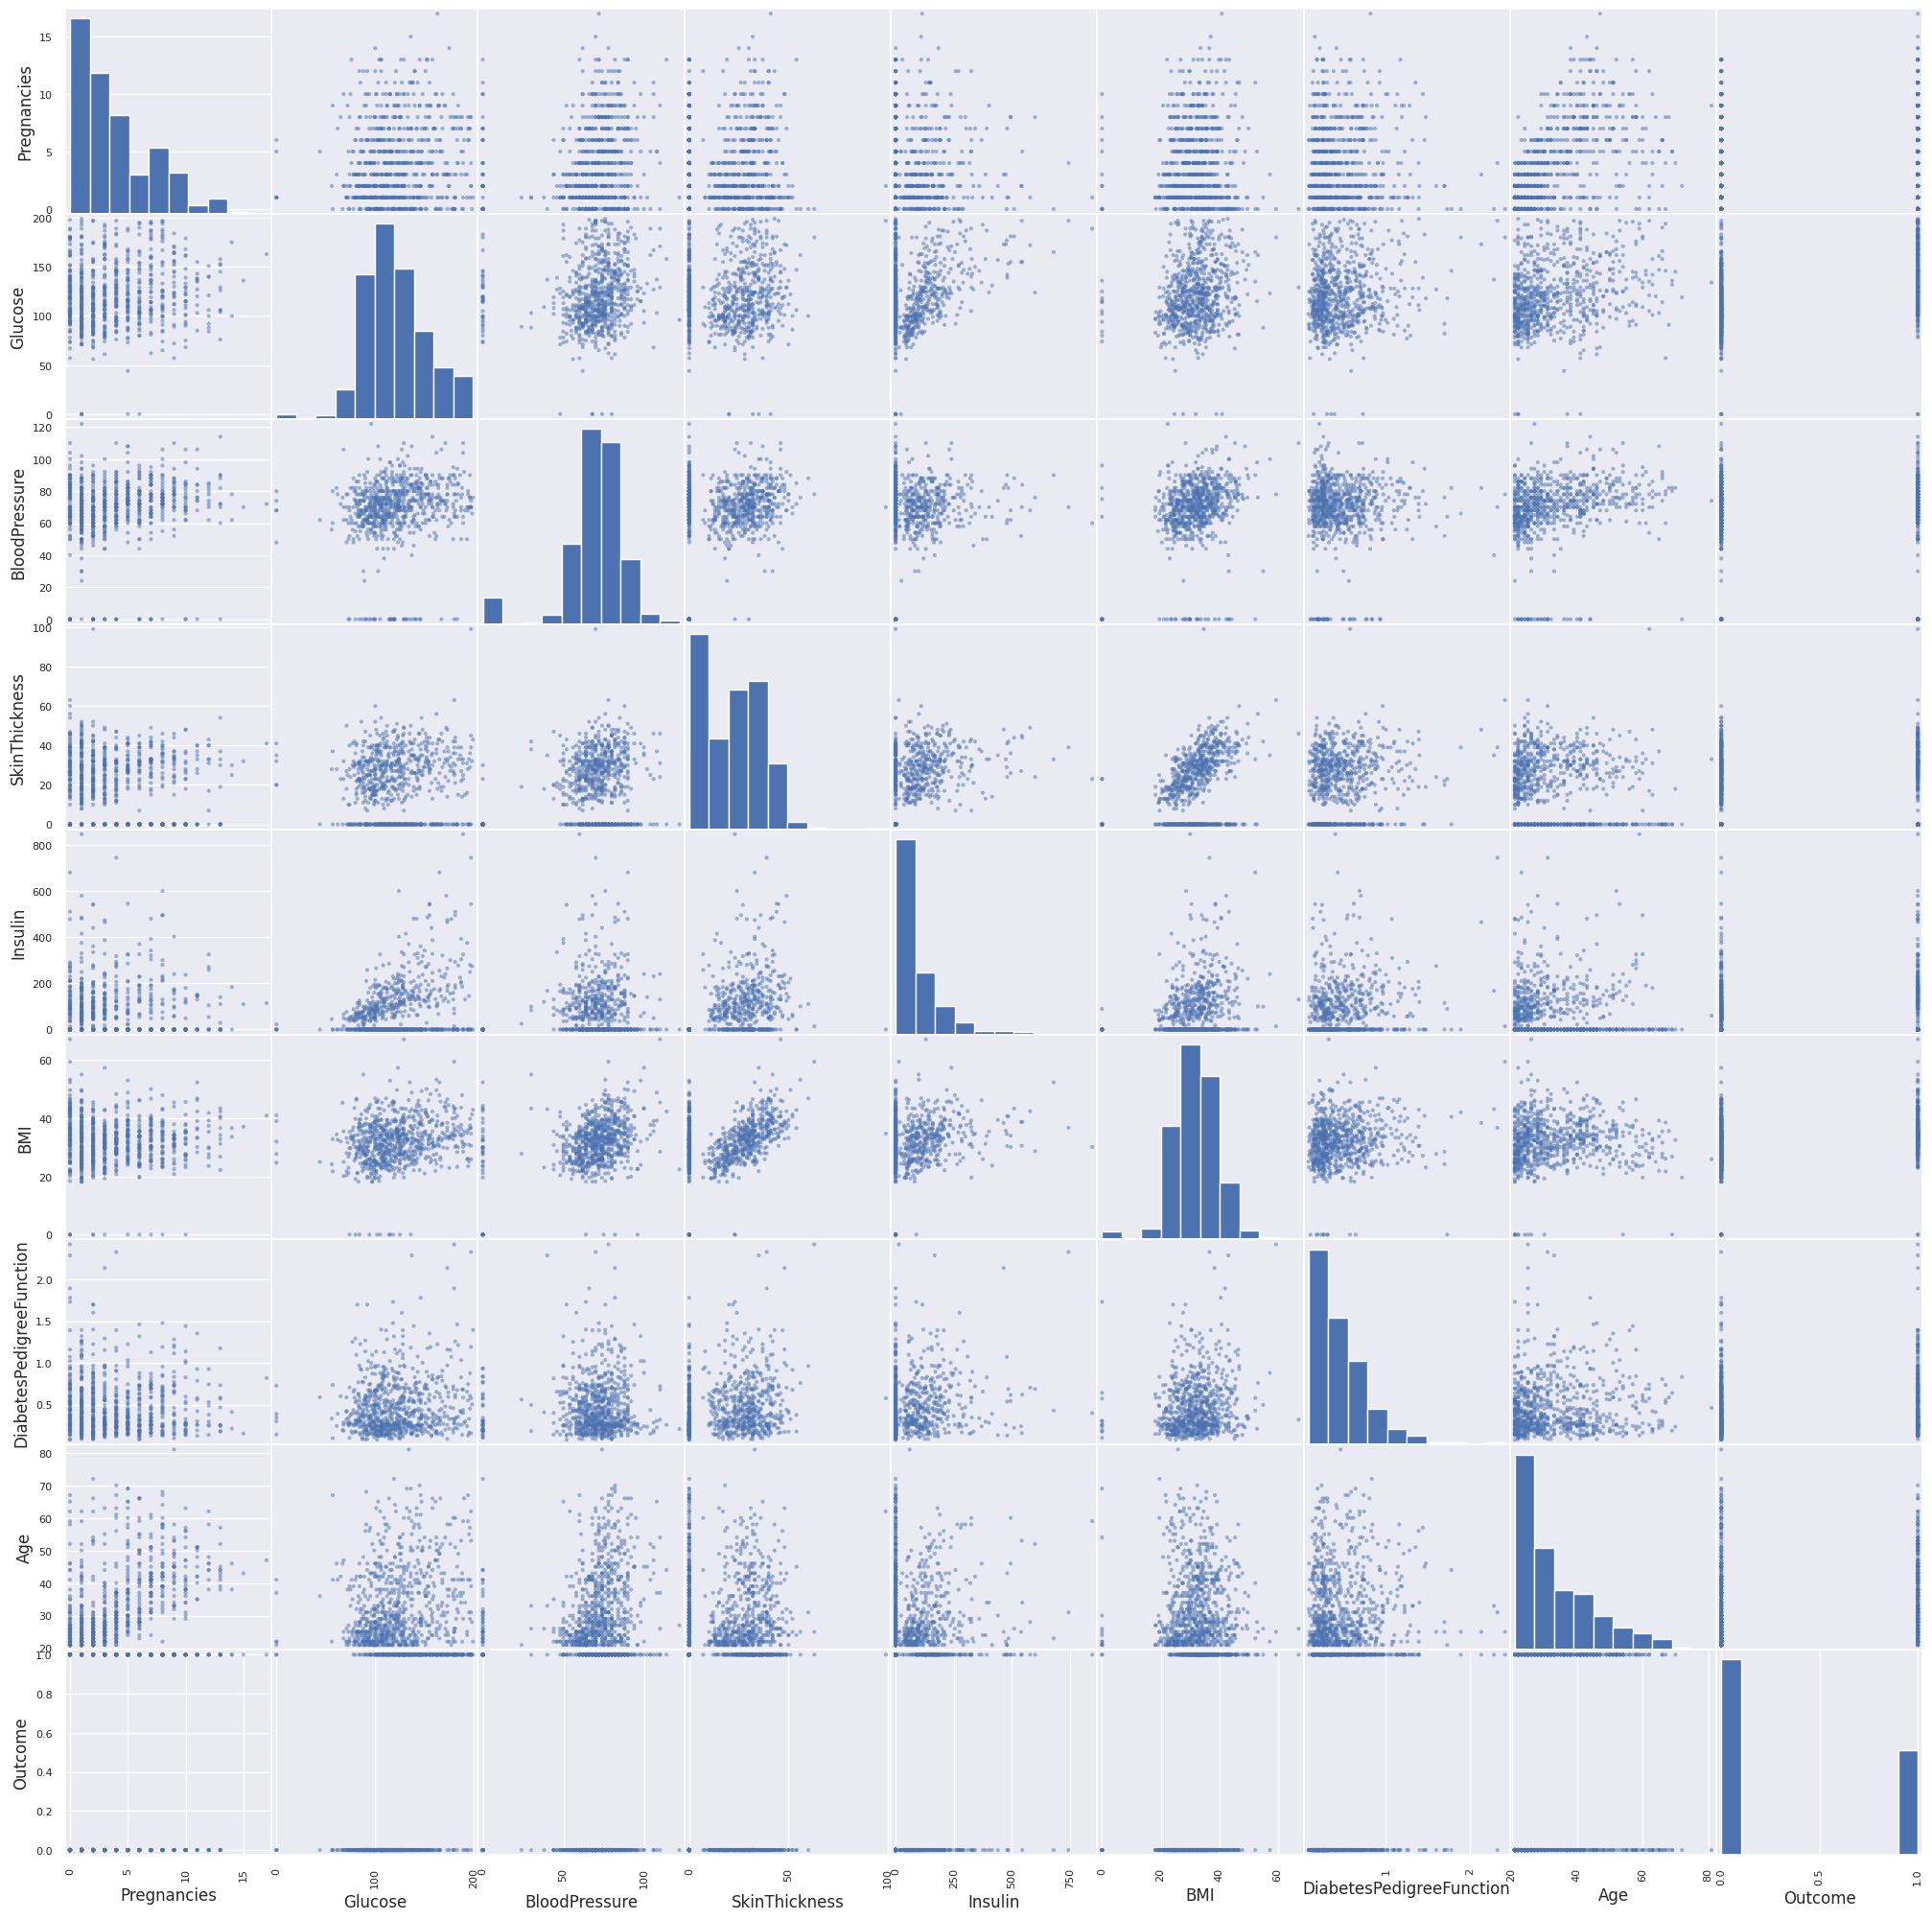

In [25]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

Plot pasangan ini mengembangkan dua gambar dasar, histogram dan scatter plot. Histogram pada diagonal memungkinkan kita untuk melihat distribusi dari satu variabel, sementara scatter plot pada segitiga atas dan bawah menunjukkan hubungan (atau ketidakhubungan) antara dua variabel.

Pair plot untuk data yang telah dibersihkan.

In [26]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

Output hidden; open in https://colab.research.google.com to view.

Pearson's Correlation Coefficient: membantu Anda menemukan hubungan antara dua besaran. Ini memberikan ukuran kekuatan asosiasi antara dua variabel. Nilai Koefisien Korelasi Pearson dapat berkisar antara -1 hingga +1. Nilai 1 berarti keduanya sangat berkorelasi dan 0 berarti tidak ada korelasi.



heat map adalah representasi dua dimensi dari informasi dengan bantuan warna. Peta panas dapat membantu pengguna memvisualisasikan informasi yang sederhana atau kompleks.

Heatmap untuk data yang belum dibersihkan.

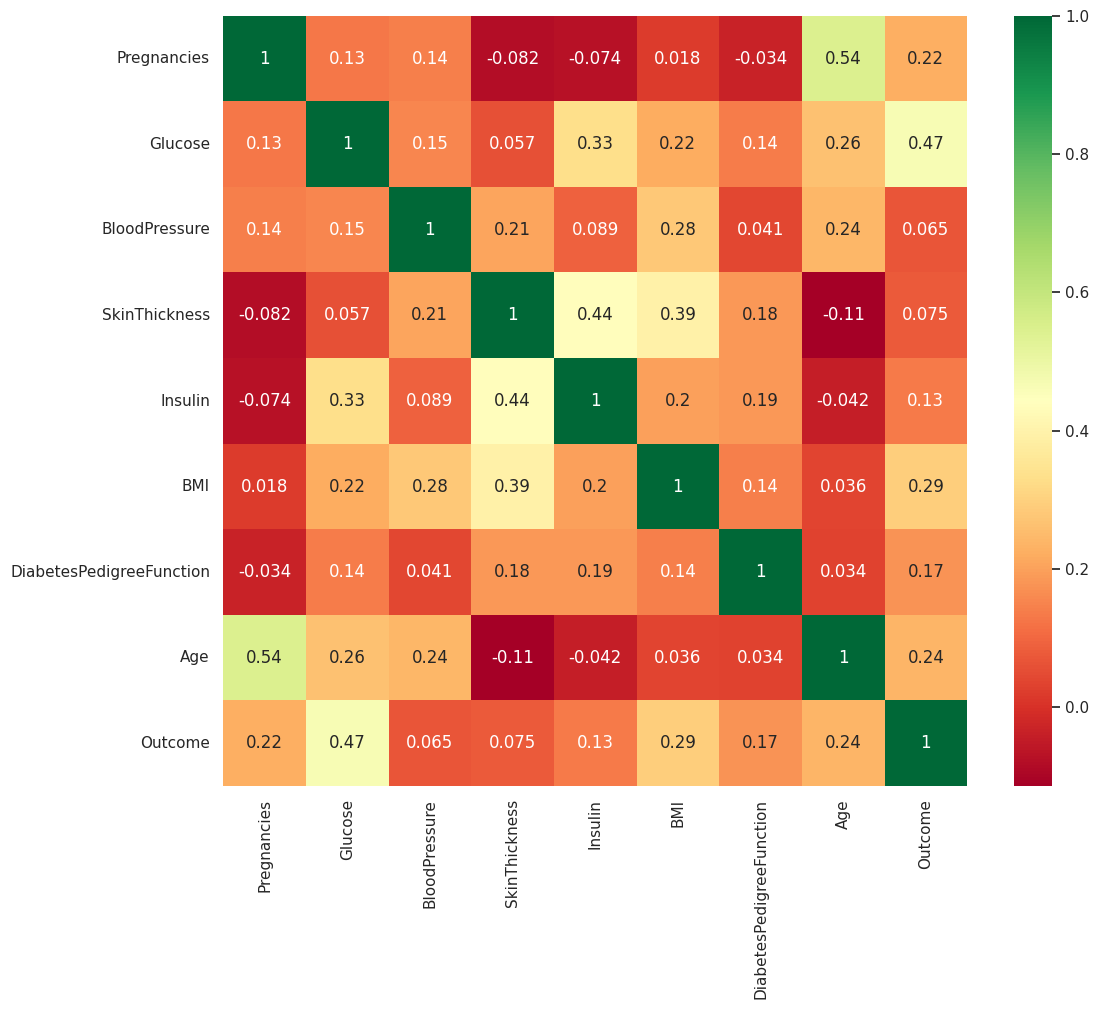

In [27]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Heatmap untuk data yang bersih

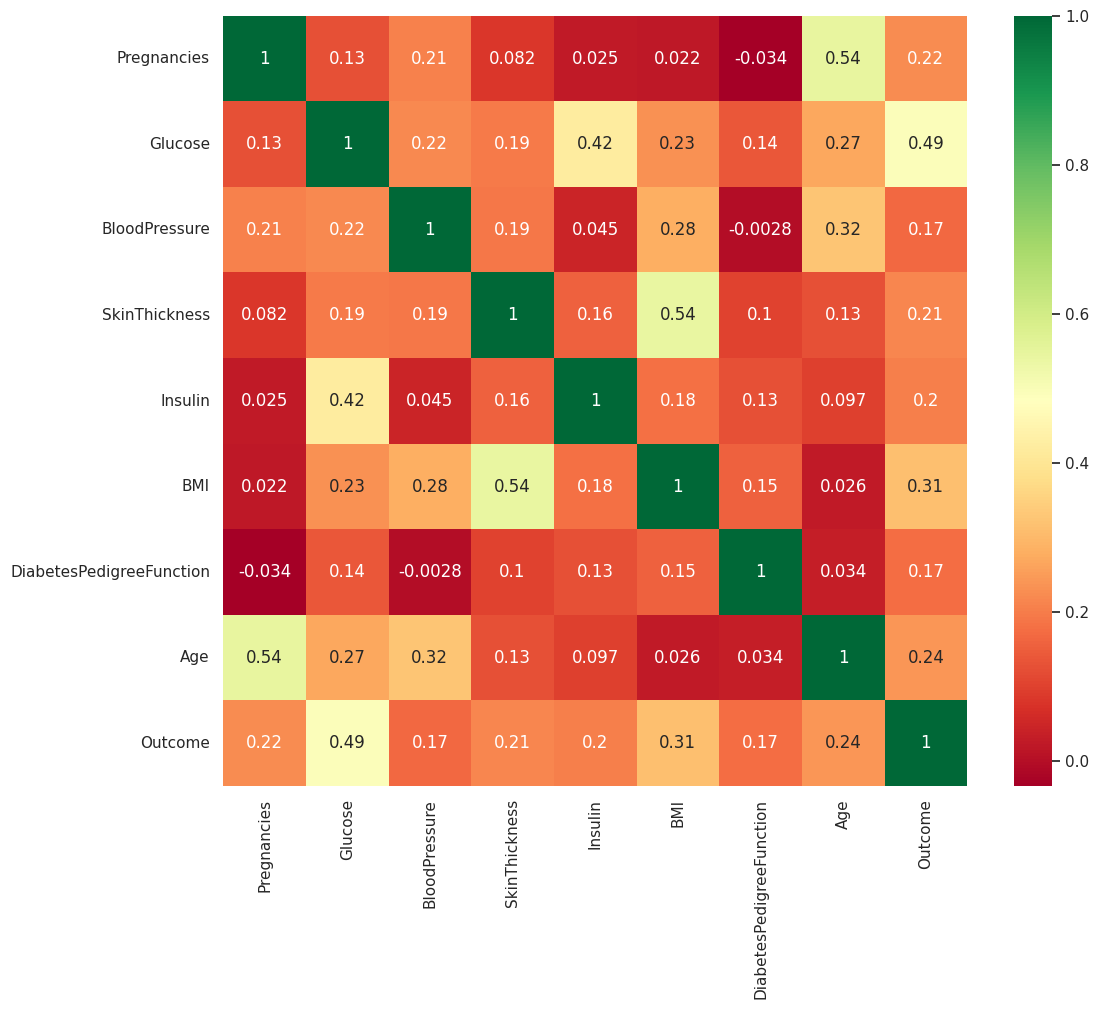

In [28]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Scaling the data

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [30]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [31]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

Mengapa Melakukan Scaling the data for KNN?


Mengukur semua fitur ke dalam skala yang sama selalu disarankan saat menerapkan algoritma berbasis jarak seperti KNN.

Test Train Split and Cross Validation methods

Train Test Split : Untuk memiliki titik data yang tidak diketahui untuk menguji data daripada menguji dengan titik yang sama dengan yang digunakan untuk melatih model. Ini membantu dalam menangkap kinerja model dengan lebih baik.

**4.implementasi method**

In [51]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [52]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [53]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [54]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


Result Visualisation

In [67]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

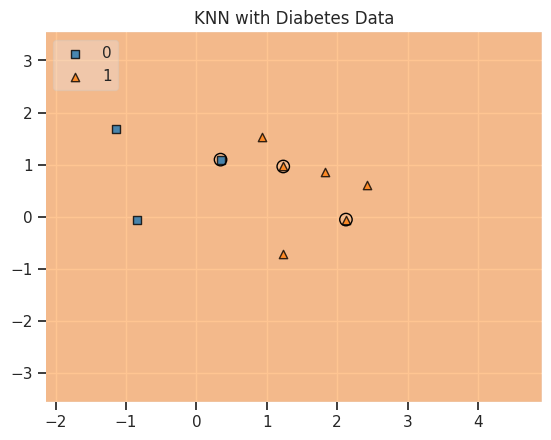

In [68]:
## trying to plot decision boundary

value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

Model Performance Analysis

**5.evaluate**

1. Confusion Matrix

The confusion matrix adalah teknik yang digunakan untuk merangkum kinerja dari sebuah algoritma klasifikasi, yakni algoritma dengan keluaran biner.

In [60]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 19.049999999999997, 'Predicted label')

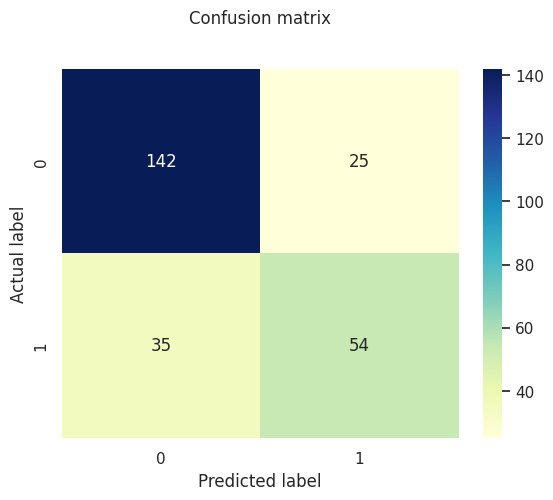

In [61]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report
Laporan yang mencakup Presisi (Precision), Recall, dan Skor F1.

In [62]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



3. ROC - AUC

ROC (Receiver Operating Characteristic) memberi informasi tentang seberapa baik model dapat membedakan antara dua hal (misalnya, apakah seorang pasien memiliki penyakit atau tidak). Model yang lebih baik dapat membedakan antara keduanya dengan akurasi yang tinggi. Sementara itu, model yang buruk akan mengalami kesulitan dalam membedakan antara keduanya.








In [63]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

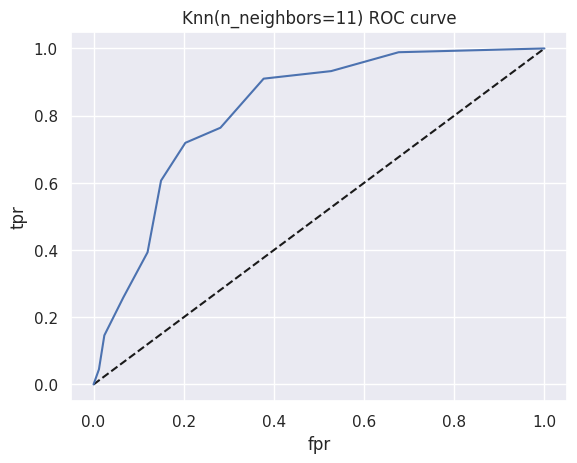

In [64]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [65]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096


Optimasi Hiperparameter dengan Grid Search adalah pendekatan untuk penyetelan hiperparameter yang secara metodis akan membangun dan mengevaluasi model untuk setiap kombinasi parameter algoritma yang ditentukan dalam suatu grid.

Mari kita pertimbangkan contoh berikut:

Misalkan, sebuah model machine learning X mengambil hiperparameter a1, a2, dan a3. Dalam pencarian grid, pertama-tama Anda mendefinisikan rentang nilai untuk masing-masing hiperparameter a1, a2, dan a3. Anda bisa menganggap ini sebagai sebuah array nilai untuk setiap hiperparameter. Teknik pencarian grid kemudian akan membuat banyak versi dari X dengan semua kombinasi mungkin dari nilai hiperparameter (a1, a2, dan a3) yang Anda tentukan sejak awal. Rentang nilai hiperparameter ini disebut sebagai grid.

Misalkan, Anda mendefinisikan grid seperti ini: a1 = [0,1,2,3,4,5] a2 = [10,20,30,40,5,60] a3 = [105,105,110,115,120,125]

Perlu dicatat bahwa, array nilai yang Anda tentukan untuk hiperparameter haruslah legitim dalam artian Anda tidak dapat memberikan nilai tipe Floating ke dalam array jika hiperparameter tersebut hanya menerima nilai Integer.

Sekarang, pencarian grid akan memulai prosesnya dengan membuat beberapa versi X dengan grid yang baru saja Anda tentukan.

Prosesnya akan dimulai dengan kombinasi [0,10,105], dan akan berakhir dengan [5,60,125]. Proses ini akan melalui semua kombinasi di antara kedua titik ini, yang membuat pencarian grid menjadi sangat mahal secara komputasi.

In [66]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
